# Explore the salt lake files

In [30]:
import xarray as xr

In [43]:
#Load the salt file
root = '/network/group/aopp/predict/TIP016_PAXTON_RPSPEEDY/ML4L/ECMWF_files/raw/' 
salt_path = f'{root}saltlakes_max/clake_639l2_yearMAX_saline'

ds_salt = xr.open_dataset(salt_path,engine='cfgrib',backend_kwargs={'indexpath': ''})
df_salt = ds_salt.to_dataframe().reset_index()

#Create some extra cols
df_salt['latitude_ERA'] = df_salt['latitude']
df_salt['longitude_ERA'] = ((df_salt['longitude'] + 180) % 360) - 180 #long3 ---> long1

In [53]:
df_salt = df_salt[['latitude_ERA','longitude_ERA','cl']].copy()

In [54]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import cartopy.crs as ccrs
import matplotlib.colors as mc
import matplotlib.colorbar as cb 


def RobinsonPlot(df,z,vmin,vmax,cmap,markersize,savefig,ncircles):


    #Setup plotting env
    fig = plt.figure(figsize=[30,20])
    ax = plt.subplot(projection=ccrs.Robinson(central_longitude=0))
    cax = fig.add_axes([0.32, 0.11, 0.4, 0.0125])

    #Get data
    x = df['latitude_ERA']
    y = df['longitude_ERA']
    z1 = df[z]
    
    
    #Normalise
    norm = mc.Normalize(vmin=vmin, vmax=vmax)

    #Colorbar
    cb1 = cb.ColorbarBase(cax, cmap=cmap,
                               norm=norm,
                               orientation='horizontal'
                               )
    #Scatter points
    sc = ax.scatter(y,x,transform=ccrs.PlateCarree(),
                    s=markersize,
                    c=cmap(norm(z1)),
                    linewidths=1, 
                    alpha=.7)


    #Latitude cutoffs
    ax.plot([-180,180],[70,70],transform=ccrs.PlateCarree(),c='0.5', linestyle='--')
    ax.plot([-180,180],[-70,-70],transform=ccrs.PlateCarree(),c='0.5', linestyle='--')


    
    #Formatting
    cax.tick_params(labelsize=30)
    cax.set_xlabel(r'$\delta$K',fontsize=34)
    

    ax.coastlines()
    ax.set_aspect('auto') #Force projection aspect ratio
    
    ax.scatter(180,0,c='1',transform=ccrs.PlateCarree(),s=100,alpha=0.1) #invisible point to set plot limits. Hacky, but works OK.

    
    
    

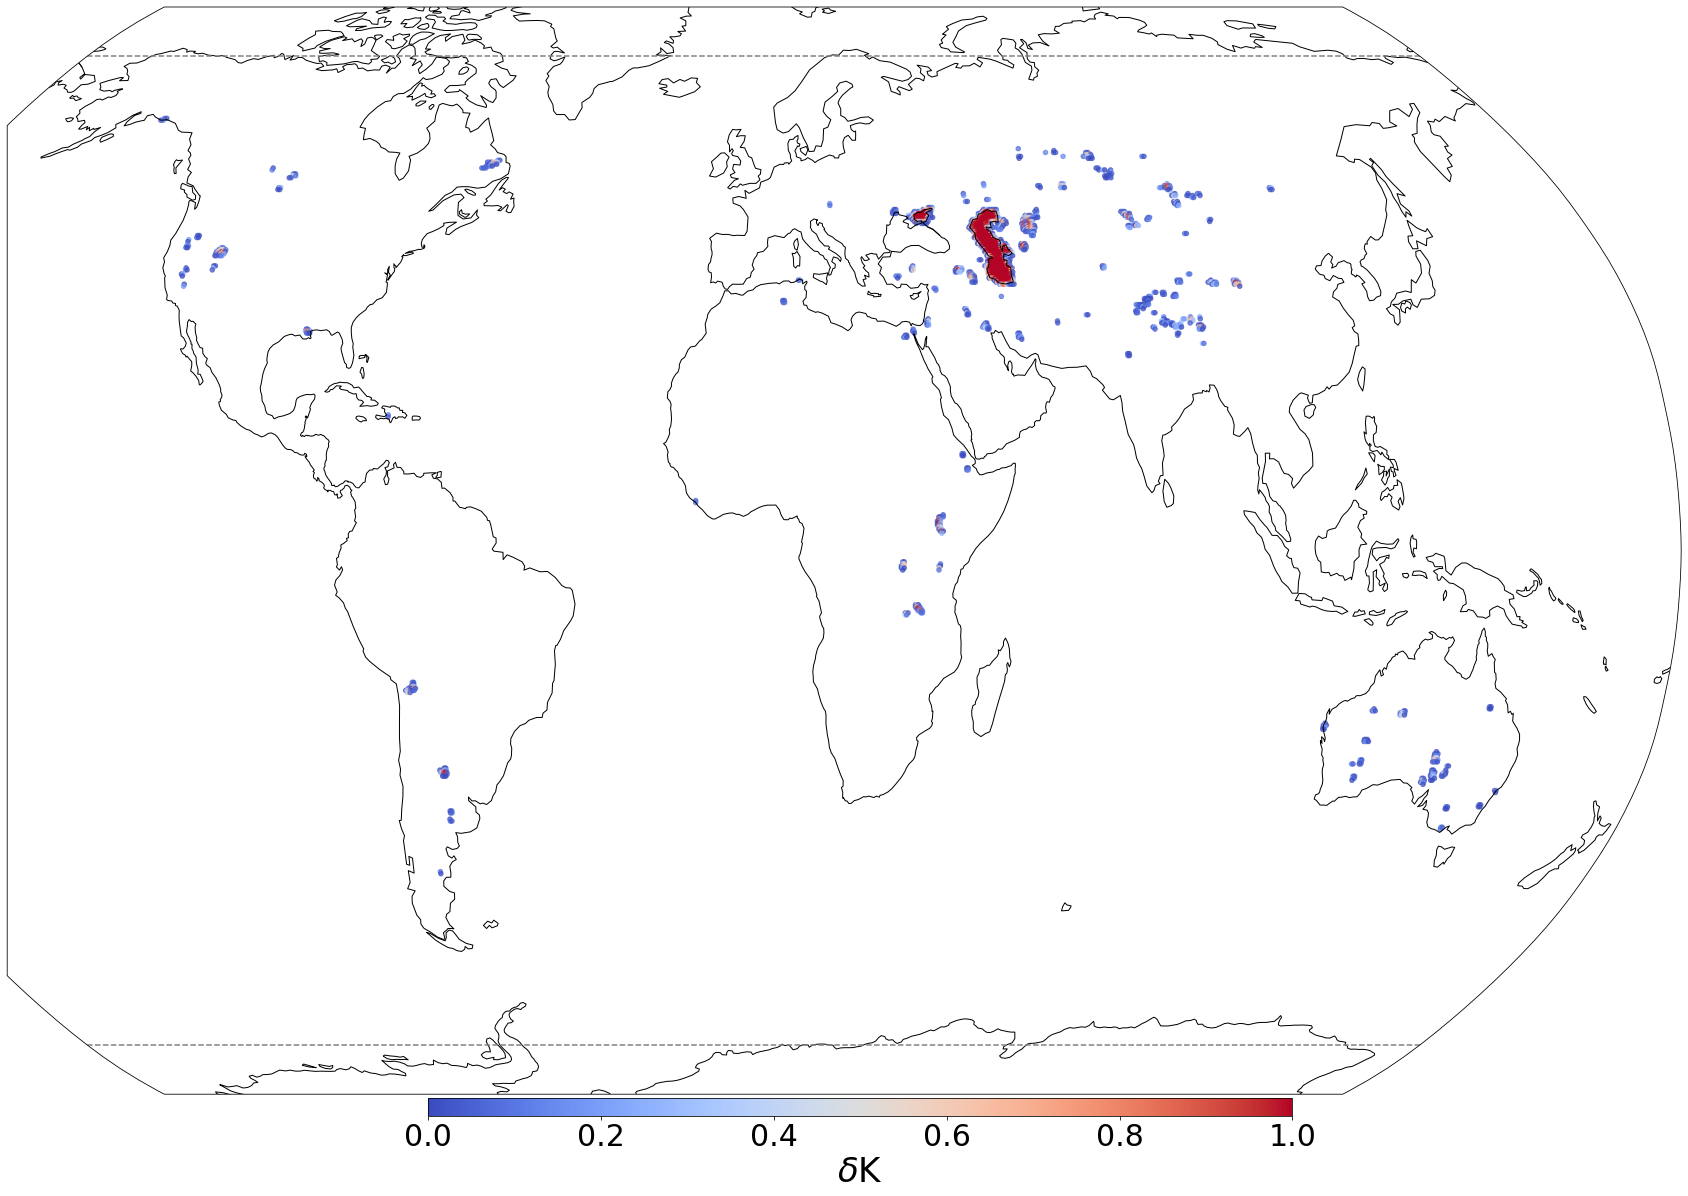

In [67]:
#Plot it

RobinsonPlot(df_salt.query('cl != 0.0'),'cl',vmin=0,vmax=1,cmap=plt.cm.coolwarm,markersize = 20,savefig=None,ncircles=None)

In [56]:

#Now load the problematic lakes points
df = pd.read_pickle('tmp_data/clean_yearly_data.pkl')
df_1100110 = df.query('bitstring == "100110"')

In [49]:
selection = df_1100110.sort_values(by=['delta'],ascending=False).iloc[0:5][['latitude_ERA','longitude_ERA']]

In [58]:
selection

latitude_ERA  longitude_ERA
71529      24.028095       69.00000
101086     41.170945     -113.40000
33374      -6.323183      -80.71875
89090      34.145187        6.08000
24181     -15.316154      127.96875

In [59]:
pd.merge(selection,df_salt,how='inner',on=['latitude_ERA', 'longitude_ERA']) 

latitude_ERA  longitude_ERA        cl
0     24.028095       69.00000  0.000000
1     41.170945     -113.40000  0.564996
2     -6.323183      -80.71875  0.000000
3     34.145187        6.08000  0.045741
4    -15.316154      127.96875  0.000000

# Land bitstrings

In [60]:
df_011100 = df.query('bitstring == "011100"')

In [62]:
pd.merge(df_011100[['latitude_ERA','longitude_ERA']],df_salt,how='inner',on=['latitude_ERA', 'longitude_ERA']) 

latitude_ERA  longitude_ERA   cl
0     -19.812640      44.437500  0.0
1      -8.852456     120.656250  0.0
2      -2.107728     -56.250000  0.0
3       1.264637     121.218750  0.0
4       1.545667     110.812500  0.0
5       5.199062     100.406250  0.0
6      19.250579     -96.187500  0.0
7      20.936761    -156.444444  0.0
8      23.185004     -82.200000  0.0
9      35.831369      -5.666667  0.0
10     37.517551     138.666667  0.0
11     38.079612      21.333333  0.0
12     38.079612     139.333333  0.0
13     41.170945      30.240000  0.0
14     60.281000    -102.400000  0.0
15     64.215421     -21.875000  0.0
16     64.777481     -23.750000  0.0
17     69.273959      34.500000  0.0

In [63]:
df_010100 = df.query('bitstring == "010100"')

In [64]:
pd.merge(df_010100[['latitude_ERA','longitude_ERA']],df_salt,how='inner',on=['latitude_ERA', 'longitude_ERA']) 

latitude_ERA  longitude_ERA   cl
0     -37.798581     148.666667  0.0
1      -2.107728     -54.000000  0.0
2      -0.983606      98.718750  0.0
3      -0.421546     132.187500  0.0
4      -0.140515     -50.062500  0.0
5       2.950819     112.218750  0.0
6      11.662760     102.937500  0.0
7      22.903974     -83.400000  0.0
8      32.459005      34.880000  0.0
9      34.426218     131.333333  0.0
10     43.419187      -4.125000  0.0
11     60.843060    -115.555556  0.0
12     64.215421      23.750000  0.0

In [69]:
eg = pd.merge(df_010100[['latitude_ERA','longitude_ERA']],df_salt,how='inner',on=['latitude_ERA', 'longitude_ERA']).iloc[2] 

In [81]:
choice_latitude = eg.latitude_ERA

In [82]:
choice_longitude = eg.longitude_ERA

# Monthly lake files




In [83]:


import glob
import sys
root = '/network/group/aopp/predict/TIP016_PAXTON_RPSPEEDY/ML4L/ECMWF_files/raw/' 
lake_path = f'{root}BonusClimate'

#ds_lake = xr.open_dataset(lake_path,engine='cfgrib',backend_kwargs={'indexpath': ''})
lake_files = sorted(glob.glob(f'{root}BonusClimate/clake*'))

In [88]:


choice_latitude = -37.798581306687026
choice_longitude = 148.66666666666663


#This is salt lake city
choice_latitude = 41.17094491970063
choice_longitude = -113.39999999999998

for l in lake_files:
    
    
    ds_lake = xr.open_dataset(l,engine='cfgrib',backend_kwargs={'indexpath': ''})
    df_lake = ds_lake.to_dataframe().reset_index()

    #Create some extra cols
    df_lake['latitude_ERA'] = df_lake['latitude']
    df_lake['longitude_ERA'] = ((df_lake['longitude'] + 180) % 360) - 180 #long3 ---> long1
    
    
    row = df_lake.query(f'latitude_ERA == {choice_latitude} & longitude_ERA == {choice_longitude}')
    
    display(row)


values       time   step  surface   latitude  longitude valid_time  \
94518   94518 2011-01-31 0 days      0.0  41.170945      246.6 2011-01-31   

        cl  latitude_ERA  longitude_ERA  
94518  0.0     41.170945         -113.4

values       time   step  surface   latitude  longitude valid_time  \
94518   94518 2011-01-31 0 days      0.0  41.170945      246.6 2011-01-31   

             cl  latitude_ERA  longitude_ERA  
94518  0.509943     41.170945         -113.4

values       time   step  surface   latitude  longitude valid_time  \
94518   94518 2011-01-31 0 days      0.0  41.170945      246.6 2011-01-31   

            cl  latitude_ERA  longitude_ERA  
94518  0.45848     41.170945         -113.4

values       time   step  surface   latitude  longitude valid_time  \
94518   94518 2011-01-31 0 days      0.0  41.170945      246.6 2011-01-31   

             cl  latitude_ERA  longitude_ERA  
94518  0.193223     41.170945         -113.4

values       time   step  surface   latitude  longitude valid_time  \
94518   94518 2011-01-31 0 days      0.0  41.170945      246.6 2011-01-31   

             cl  latitude_ERA  longitude_ERA  
94518  0.139014     41.170945         -113.4

values       time   step  surface   latitude  longitude valid_time  \
94518   94518 2011-01-31 0 days      0.0  41.170945      246.6 2011-01-31   

             cl  latitude_ERA  longitude_ERA  
94518  0.113429     41.170945         -113.4

values       time   step  surface   latitude  longitude valid_time  \
94518   94518 2011-01-31 0 days      0.0  41.170945      246.6 2011-01-31   

            cl  latitude_ERA  longitude_ERA  
94518  0.03282     41.170945         -113.4

values       time   step  surface   latitude  longitude valid_time  \
94518   94518 2011-01-31 0 days      0.0  41.170945      246.6 2011-01-31   

             cl  latitude_ERA  longitude_ERA  
94518  0.016732     41.170945         -113.4

values       time   step  surface   latitude  longitude valid_time  \
94518   94518 2011-01-31 0 days      0.0  41.170945      246.6 2011-01-31   

             cl  latitude_ERA  longitude_ERA  
94518  0.099681     41.170945         -113.4

values       time   step  surface   latitude  longitude valid_time  \
94518   94518 2011-01-31 0 days      0.0  41.170945      246.6 2011-01-31   

             cl  latitude_ERA  longitude_ERA  
94518  0.302355     41.170945         -113.4

values       time   step  surface   latitude  longitude valid_time  \
94518   94518 2011-01-31 0 days      0.0  41.170945      246.6 2011-01-31   

        cl  latitude_ERA  longitude_ERA  
94518  0.0     41.170945         -113.4

values       time   step  surface   latitude  longitude valid_time  \
94518   94518 2011-01-31 0 days      0.0  41.170945      246.6 2011-01-31   

        cl  latitude_ERA  longitude_ERA  
94518  0.0     41.170945         -113.4

In [79]:
ds_lake = xr.open_dataset(lake_files[0],engine='cfgrib',backend_kwargs={'indexpath': ''})


In [80]:
ds_lake

<xarray.Dataset>
Dimensions:     (values: 542080)
Coordinates:
    time        datetime64[ns] ...
    step        timedelta64[ns] ...
    surface     float64 ...
    latitude    (values) float64 ...
    longitude   (values) float64 ...
    valid_time  datetime64[ns] ...
Dimensions without coordinates: values
Data variables:
    cl          (values) float32 ...
Attributes:
    GRIB_edition:            2
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2022-08-23T14:45 GRIB to CDM+CF via cfgrib-0.9.1...